<a href="https://colab.research.google.com/github/jhsam007/Heart-Disease-Prediction-Using-Deep-Learning/blob/main/Predicting_Student_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [41]:
df=pd.read_csv('http://bit.ly/w-data')

In [44]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [47]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [48]:
x = df.iloc[:,:-1].values
y= df.iloc[:, 1].values

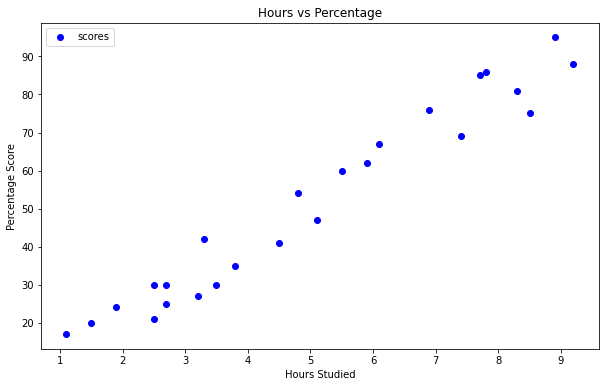

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='scores',color='blue') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [68]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

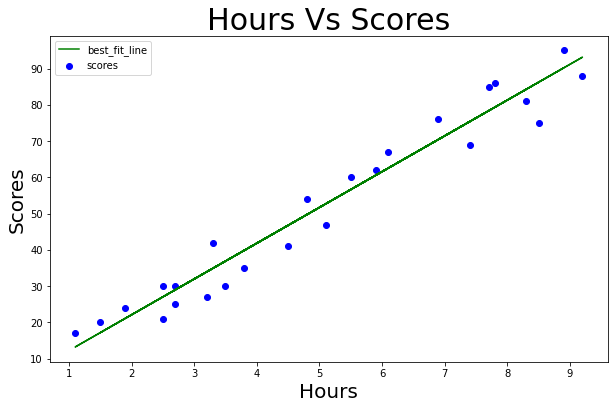

In [69]:
best_fit_line=regressor.coef_*x+regressor.intercept_
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='scores',color='blue')
plt.plot(x,best_fit_line,'g-',label='best_fit_line')
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Hours Vs Scores',fontsize=30)
plt.legend()
plt.show()

In [70]:
print(x_test)
y_pred=regressor.predict(x_test)

[[7.4]
 [3.8]
 [8.3]
 [5.9]
 [6.1]]


In [72]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,69,75.391075
1,35,39.867876
2,81,84.271874
3,62,60.589742
4,67,62.563253


In [73]:
## Evaluating the Model on different Metrics
scores_names=['Mean Squared Error','Root Mean Squared Error','Mean Absolute Error', 'R2 Score']
scores=[]
scores.append(mean_squared_error(y_test,y_pred))
scores.append(np.sqrt(mean_squared_error(y_test,y_pred)))
scores.append(mean_absolute_error(y_test,y_pred))
scores.append(r2_score(y_test,y_pred))
df=pd.DataFrame({'Evaluation Metric':scores_names , 'Values':scores})
df

,Evaluation Metric,Values
0,Mean Squared Error,19.384153
1,Root Mean Squared Error,4.402744
2,Mean Absolute Error,4.075566
3,R2 Score,0.916505


In [82]:
hours = 9.25
score=regressor.predict([[hours]])

In [88]:
print("If a Student studies for {} hours/day then his predicted total score would be {:.2f}".format(hours,score[0]))

If a Student studies for 9.25 hours/day then his predicted total score would be 93.65
